In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
results = {
    "scDiff": {  # v7.3
        "Adamson": {
            "Delta Pearson Correlation": [0.62080, 0.60610, 0.73870, 0.65600, 0.51270],
            "MSE Top 20 DE": [0.28040, 0.28380, 0.24150, 0.26310, 0.28550],
        },
        "Dixit": {
            "Delta Pearson Correlation": [0.74360, 0.79580, 0.65110, 0.67360, 0.87750],
            "MSE Top 20 DE": [0.01009, 0.00954, 0.01589, 0.01265, 0.00487],
        },
        "Norman": {
            "Delta Pearson Correlation": [0.47170, 0.51140, 0.44440, 0.44410, 0.47950],
            "MSE Top 20 DE": [0.41490, 0.39780, 0.42960, 0.44010, 0.43670],
        },
    },
    "GEARS": {
        "Adamson": {
            "Delta Pearson Correlation": [0.5234, 0.5521, 0.5345, 0.3327, 0.4917],
            "MSE Top 20 DE": [0.2796, 0.2585, 0.2790, 0.5131, 0.2541],
        },
        "Dixit": {
            "Delta Pearson Correlation": [0.5458, 0.5980, 0.7351, 0.4779, 0.7385],
            "MSE Top 20 DE": [0.0423, 0.0235, 0.0307, 0.0325, 0.0305],
        },
        "Norman": {
            "Delta Pearson Correlation": [0.3857, 0.5127, 0.4078, 0.3900, 0.3126],
            "MSE Top 20 DE":[0.3345, 0.2567, 0.4291, 0.3213, 0.4501],
        },
    },
}

dfs = []
for method, methods_results in results.items():
    for dataset, dataset_results in methods_results.items():
        df = pd.DataFrame(dataset_results)
        df["Method"] = method
        df["Dataset"] = dataset
        dfs.append(df)
result_df = pd.concat(dfs).reset_index(drop=True)
result_df

,Delta Pearson Correlation,MSE Top 20 DE,Method,Dataset
0,0.6208,0.28040,scDiff,Adamson
1,0.6061,0.28380,scDiff,Adamson
2,0.7387,0.24150,scDiff,Adamson
3,0.6560,0.26310,scDiff,Adamson
4,0.5127,0.28550,scDiff,Adamson
5,0.7436,0.01009,scDiff,Dixit
6,0.7958,0.00954,scDiff,Dixit
7,0.6511,0.01589,scDiff,Dixit
8,0.6736,0.01265,scDiff,Dixit
9,0.8775,0.00487,scDiff,Dixit


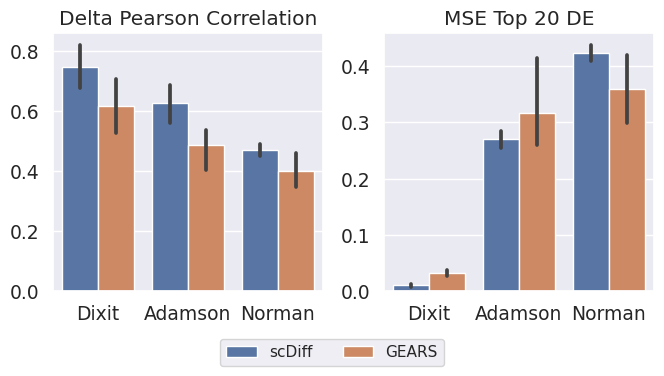

In [3]:
metrics = ["Delta Pearson Correlation", "MSE Top 20 DE"]

fig, axes = plt.subplots(1, 2, figsize=(6.8, 3.5))

for i, (metric, ax) in enumerate(zip(metrics, axes)):
    sns.barplot(
        data=result_df,
        y=metric,
        hue="Method",
        x="Dataset",
        order=["Dixit", "Adamson", "Norman"],
        ax=ax,
    )
    ax.set_title(metric, fontdict={"fontsize": 14.5})
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='both', which='major', labelsize=13.5)
    
    if i == 0:
        label_handles = {label: handle for handle, label in zip(*ax.get_legend_handles_labels())}

    ax.legend([],[], frameon=False)

fig.legend(
    label_handles.values(),
    label_handles.keys(),
    loc="upper center",
    bbox_to_anchor=(0.5, 0.03),
    ncols=2,
)

plt.tight_layout()
# plt.savefig("gene_pert_perf.pdf", bbox_inches="tight")  # uncomment to save
plt.show()

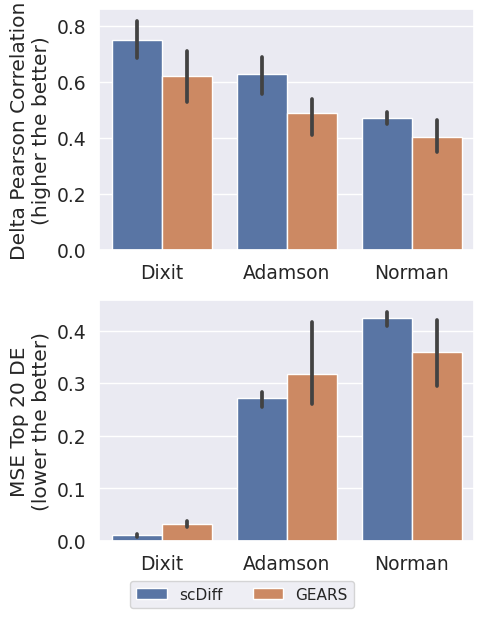

In [4]:
metrics = ["Delta Pearson Correlation", "MSE Top 20 DE"]

fig, axes = plt.subplots(2, 1, figsize=(5, 6))

for i, (metric, ax) in enumerate(zip(metrics, axes)):
    sns.barplot(
        data=result_df,
        y=metric,
        hue="Method",
        x="Dataset",
        order=["Dixit", "Adamson", "Norman"],
        ax=ax,
    )
    ax.set_xlabel("")
    if metric.startswith("Delta"):
        extra = "\n(higher the better)"
    else:
        extra = "\n(lower the better)"
    ax.set_ylabel(metric + extra, fontdict={"fontsize": 14.5})
    ax.tick_params(axis='both', which='major', labelsize=13.5)
    
    if i == 0:
        label_handles = {label: handle for handle, label in zip(*ax.get_legend_handles_labels())}

    ax.legend([],[], frameon=False)

fig.legend(
    label_handles.values(),
    label_handles.keys(),
    loc="upper center",
    bbox_to_anchor=(0.5, 0.03),
    ncols=2,
)

plt.tight_layout()
# plt.savefig("gene_pert_perf.pdf", bbox_inches="tight")  # uncomment to save
plt.show()